In [36]:
%%capture
!pip install  langchain
!pip install  langchain-experimental
!pip install  matplotlib
!pip install  seaborn
!pip install  openai
!pip install  tiktoken
!pip install  pandas
!pip install  langchain-openai

In [29]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv('/content/student-mat.csv')

In [11]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [23]:
from google.colab import userdata
api_key = userdata.get('Free_Llama_Api_Key')

In [34]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=api_key,
)


In [31]:

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  extra_body={},
  model="meta-llama/llama-3.3-70b-instruct",
  messages=[
    {
      "role": "user",
      "content": "What is the meaning of life?"
    }
  ]
)
print(completion.choices[0].message.content)

The meaning of life is a philosophical question that has puzzled humans for centuries. It's a question that has sparked intense debate, reflection, and exploration across various disciplines, including philosophy, psychology, science, spirituality, and culture. While there is no one definitive answer, here are some perspectives to consider:

1. **Biological perspective**: From a biological standpoint, the meaning of life is to survive and reproduce. This is the fundamental drive of all living organisms, from bacteria to humans. Our instincts, emotions, and behaviors are shaped by this basic imperative.
2. **Existentialist perspective**: Existentialist philosophers like Jean-Paul Sartre and Martin Heidegger argue that life has no inherent meaning. Instead, individuals must create their own purpose and meaning through their choices, actions, and experiences.
3. **Spiritual or religious perspective**: Many spiritual and religious traditions believe that the meaning of life is to connect w

In [37]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="meta-llama/llama-3.3-70b-instruct",
    openai_api_key=api_key,
    openai_api_base="https://openrouter.ai/api/v1"
)


In [57]:
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    return_intermediate_steps=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True
    )

/usr/local/lib/python3.12/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [40]:
response = agent.invoke("How many rows are in this dataframe")



> Entering new AgentExecutor chain...
Thought: The number of rows in a pandas DataFrame can be obtained using the `len()` function or the `shape` attribute. I will use the `shape` attribute to get the number of rows.

Action: python_repl_ast
Action Input: `print(df.shape[0])`395
I now know the final answer

Final Answer: There are 395 rows in this dataframe.

> Finished chain.


In [41]:
response['output']

'There are 395 rows in this dataframe.'

In [42]:
len(df)

395

In [43]:
response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n')

'`print(df.shape[0])`'

In [44]:
response = agent.invoke("Give me all the data where student's age is over 18 years old.")



> Entering new AgentExecutor chain...
Thought: To get the data where the student's age is over 18 years old, I need to filter the dataframe based on the 'age' column.

Action: python_repl_ast
Action Input: 
```python
print(df[df['age'] > 18])
```    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
127     GP   F   19       U     GT3       T     0     1   at_home     other   
153     GP   M   19       U     GT3       T     3     2  services   at_home   
210     GP   F   19       U     GT3       T     3     3     other     other   
247     GP   M   22       U     GT3       T     3     1  services  services   
257     GP   M   19       U     LE3       A     4     3  services   at_home   
270     GP   F   19       U     GT3       T     3     3     other  services   
296     GP   F   19       U     GT3       T     4     4    health     other   
304     GP   M   19       U     GT3       T     3     3     other     other   
306     GP   M   20       U     GT3      

In [45]:
print(response)

{'input': "Give me all the data where student's age is over 18 years old.", 'output': "The data where the student's age is over 18 years old is:\n\n     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \\\n127     GP   F   19       U     GT3       T     0     1   at_home     other   \n153     GP   M   19       U     GT3       T     3     2  services   at_home   \n210     GP   F   19       U     GT3       T     3     3     other     other   \n247     GP   M   22       U     GT3       T     3     1  services  services   \n257     GP   M   19       U     LE3       A     4     3  services   at_home   \n270     GP   F   19       U     GT3       T     3     3     other  services   \n296     GP   F   19       U     GT3       T     4     4    health     other   \n304     GP   M   19       U     GT3       T     3     3     other     other   \n306     GP   M   20       U     GT3       A     3     2  services     other   \n307     GP   M   19       U     GT3       T     4 

In [46]:
response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n')

"```python\nprint(df[df['age'] > 18])\n```"



> Entering new AgentExecutor chain...
Thought: To plot the gender count with bars, we need to first count the number of males and females in the 'sex' column of the dataframe. Then, we can use matplotlib to create a bar plot.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt
print(df['sex'].value_counts())
```sex
F    208
M    187
Name: count, dtype: int64
Now that we have the counts, we can proceed to create the bar plot using matplotlib.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind='bar')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
```

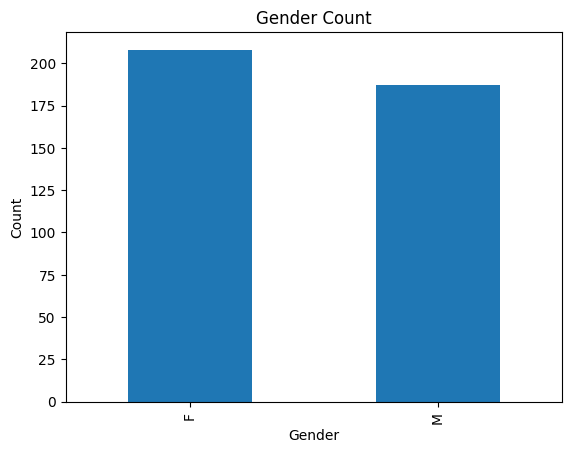

I now know the final answer

Final Answer: The gender count is plotted with bars, showing that there are 208 females and 187 males in the dataset. The plot has a title 'Gender Count', x-axis label 'Gender', and y-axis label 'Count'.

> Finished chain.


In [47]:
response=agent.invoke("plot the gender count with bars")

In [48]:
print(response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n'))

```python
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind='bar')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
```


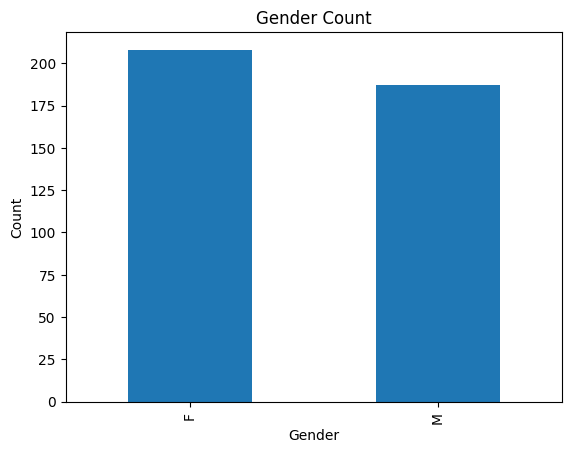

In [49]:
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind='bar')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



> Entering new AgentExecutor chain...
Thought: To generate a pie chart to display the average value of Walc for each gender, we first need to calculate the average Walc for each gender. Then, we can use a library like matplotlib to create the pie chart.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt
average_walc = df.groupby('sex')['Walc'].mean()
print(average_walc)
```sex
F    1.956731
M    2.663102
Name: Walc, dtype: float64


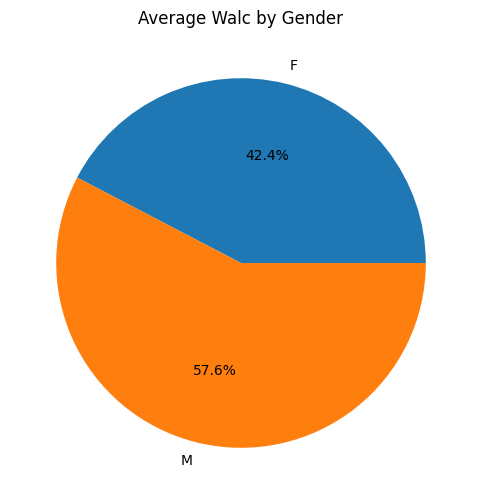

Now that we have the average Walc values for each gender, we can proceed to create the pie chart using matplotlib.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt
average_walc = df.groupby('sex')['Walc'].mean()
plt.figure(figsize=(8, 6))
plt.pie(average_walc, labels = average_walc.index, autopct='%1.1f%%')
plt.title('Average Walc by Gender')
plt.show()
```I now know the final answer

Final Answer: 
The average Walc value for females is 1.956731 and for males is 2.663102. 

A pie chart with these values can be generated by running the following code:
```python
import matplotlib.pyplot as plt
average_walc = df.groupby('sex')['Walc'].mean()
plt.figure(figsize=(8, 6))
plt.pie(average_walc, labels = average_walc.index, autopct='%1.1f%%')
plt.title('Average Walc by Gender')
plt.show()
```

> Finished chain.


In [50]:
response = agent.invoke("Generate a pie chart to display average value of Walc for each Gender.")

In [51]:
print(response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n'))

```python
import matplotlib.pyplot as plt
average_walc = df.groupby('sex')['Walc'].mean()
plt.figure(figsize=(8, 6))
plt.pie(average_walc, labels = average_walc.index, autopct='%1.1f%%')
plt.title('Average Walc by Gender')
plt.show()
```




> Entering new AgentExecutor chain...
Thought: To analyze the relationship between 'freetime' and 'G3', we can use box plots to visualize the distribution of 'G3' across different levels of 'freetime'. Since 'freetime' is a categorical variable with a limited number of unique values, we can use a box plot to compare the median and interquartile range of 'G3' for each level of 'freetime'.

Action: python_repl_ast
Action Input:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame
plt.figure(figsize=(10,6))
plt.boxplot([df.loc[df['freetime'] == i, 'G3'] for i in df['freetime'].unique()], labels=df['freetime'].unique())
plt.xlabel('Freetime')
plt.ylabel('G3 (Final Grade)')
plt.title('Box Plot of G3 vs Freetime')
plt.show()
```

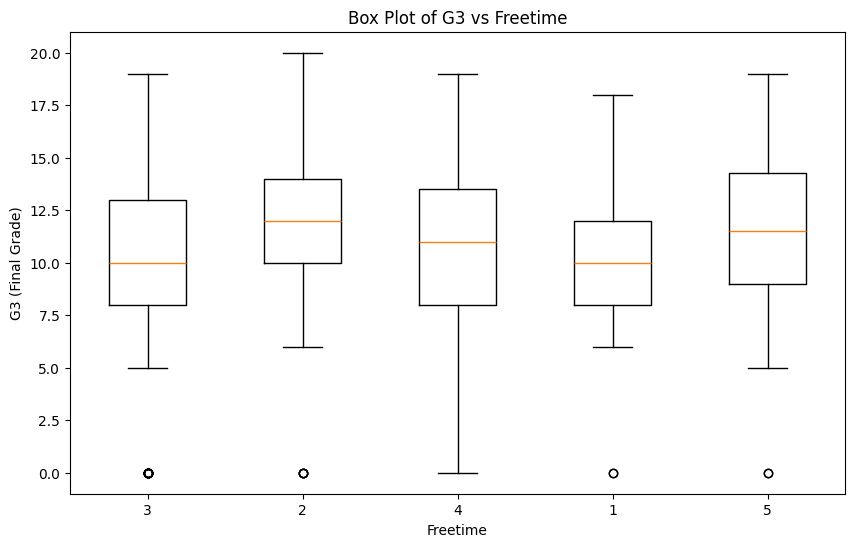

Based on the provided code and the observation of the box plot, we can analyze the relationship between 'freetime' and 'G3'. The box plot will show the median and interquartile range of 'G3' for each level of 'freetime'.

To answer the question, let's assume that we have executed the code and observed the box plot.

Thought: I now know how to analyze the relationship between 'freetime' and 'G3'
Final Answer: The code provided will create a box plot to analyze the relationship between 'freetime' (amount of free time) and 'G3' (final grade) across different levels of free time. The box plot will show the median and interquartile range of 'G3' for each level of 'freetime', allowing us to visualize and compare the distribution of 'G3' across different levels of 'freetime'.

> Finished chain.


In [52]:
response = agent.invoke("Create box plots to analyze the relationship between 'freetime' (amount of free time) and 'G3' (final grade) across different levels of free time.")

In [53]:
print(response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n'))

```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame
plt.figure(figsize=(10,6))
plt.boxplot([df.loc[df['freetime'] == i, 'G3'] for i in df['freetime'].unique()], labels=df['freetime'].unique())
plt.xlabel('Freetime')
plt.ylabel('G3 (Final Grade)')
plt.title('Box Plot of G3 vs Freetime')
plt.show()
```




> Entering new AgentExecutor chain...
Thought: First, we need to import the necessary libraries to create scatter plots. We will use matplotlib for this purpose.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt
```Now that we have imported the necessary library, we can proceed to create the scatter plots.

Action: python_repl_ast
Action Input:
```python
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(df['Dalc'], df['G3'])
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.title('Correlation between Dalc and G3')

plt.subplot(1,2,2)
plt.scatter(df['Walc'], df['G3'])
plt.xlabel('Walc')
plt.ylabel('G3')
plt.title('Correlation between Walc and G3')

plt.tight_layout()
plt.show()
```

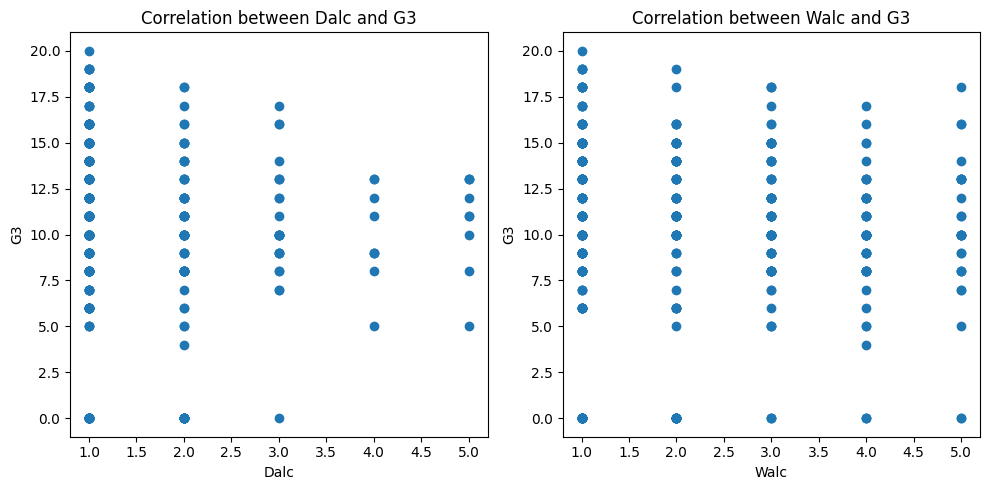

I now know the final answer

Final Answer: The code generates two scatter plots side by side. The first plot examines the correlation between 'Dalc' (daily alcohol consumption) and 'G3', while the second plot examines the correlation between 'Walc' (weekend alcohol consumption) and 'G3'. These plots can help visualize the relationship between alcohol consumption and academic performance.

> Finished chain.


In [58]:
response = agent.invoke("Generate scatter plots to examine the correlation between 'Dalc' (daily alcohol consumption) and 'G3', and between 'Walc' (weekend alcohol consumption) and 'G3'.")

In [59]:
print(response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n'))

```python
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(df['Dalc'], df['G3'])
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.title('Correlation between Dalc and G3')

plt.subplot(1,2,2)
plt.scatter(df['Walc'], df['G3'])
plt.xlabel('Walc')
plt.ylabel('G3')
plt.title('Correlation between Walc and G3')

plt.tight_layout()
plt.show()
```
